# Master Project 

## The Data

Subset of the LendingClub DataSet obtained from Kaggle https://www.kaggle.com/datasets/wordsforthewise/lending-club

**What is Kaggle?**

Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges.

## My Aims
To solve credit fraud detection using deep learning models; in the future, when the companies get a new potential client, 
they will be able to anticipate whether or not they will repay the loan. 
Furthermore, this project will assist finance organisations in calculating the risk that their clients will pose, learning ahead of time about a prospective non-repayment issue,
and taking action according to the customer.

## This project will be Three Sections

**Section1:** Exploratory Data Analysis, aims of this sections; get an understanding for which variables are important, view summary statistics, and visualize the data.

**Section2:** Data PreProcessing, aims of this section; remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

**Section3:** Creating and Evaluating Model Performance, aims of this section;	Predict whether give loans to new customers , finding customers whether paying back their loan.

## Loading the data and other imports

In [154]:
# objective:Create a solution that automatically collects data from data sheets and adapts it to the desired format. Using  below libraries
import pandas as pd 
import numpy as np

#---------------------------------------------------------------------------------------------------#
#objective:Employ a Programming Language to visualise and monitor data from the collection. Using below libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#---------------------------------------------------------------------------------------------------#
#objective: Create a deep learning model and evaluate model performance. Using below libraries   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [155]:
#Stoping unusuall warnings 
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [156]:
## Provide feature information on the data as a .csv file for easy lookup throughout the notebook
df_info=pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [157]:
df_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [158]:
# Creating Function to get information from Description 
def feat_info(col_name):
    print(df_info.loc[col_name]['Description'])

# Example
feat_info('loan_amnt')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
The monthly payment owed by the borrower if the loan originates.


**Importing actual dataset**

In [159]:
df1=pd.read_csv('lending_club_loan.csv')

In [160]:
# Checking top of 5 rows on dataset
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [161]:
#The info() method prints information about the DataFrame.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Section 1: Exploratory Data Analysis

**TASK: Since I will be attempting to predict loan_status, create a countplot as shown below.**

In [162]:
print(" Data set dimensions : {}".format(df1.shape))
df1.groupby('loan_status').size()

 Data set dimensions : (396030, 27)


loan_status
Charged Off     77673
Fully Paid     318357
dtype: int64

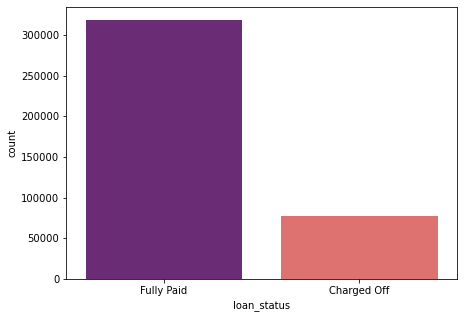

In [163]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan_status',data=df1,palette = "magma");

**TASK: Balancing target columns**  

In [164]:
df2 = df1.loc[df1['loan_status']=='Fully Paid'].sample(n=77000).copy()
#All Churned Customers
df3 = df1.loc[df1['loan_status']=='Charged Off'].copy()
#Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)# Shuffle raws randomly
df4 = df4.sample(frac=1)# Reset index of every  raws
df4.reset_index(drop=True, inplace=True)
df=df4.copy()

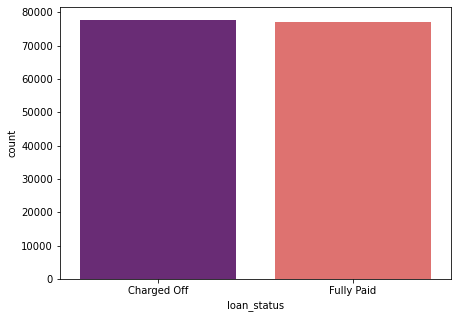

In [165]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan_status',data=df,palette = "magma");

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

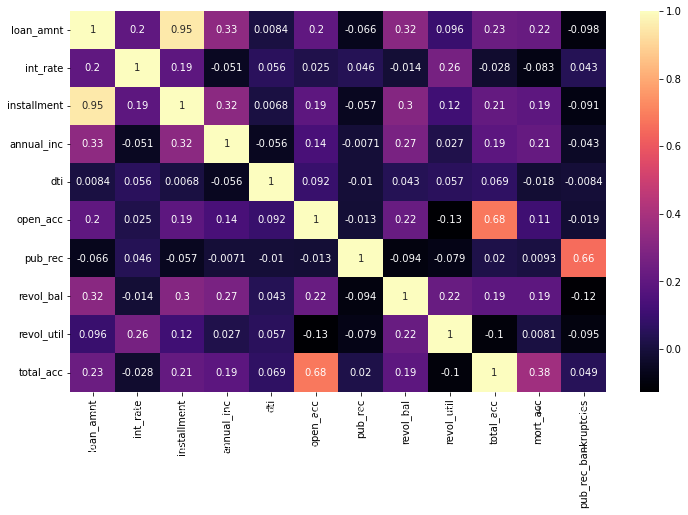

In [166]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='magma')
plt.ylim(10, 0);

**It has been noticed almost perfect correlation with 'Loan_amnt' the "installment" feature. Explore this feature further.**


In [167]:
feat_info('loan_amnt')
print('\n')
feat_info('installment')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


The monthly payment owed by the borrower if the loan originates.


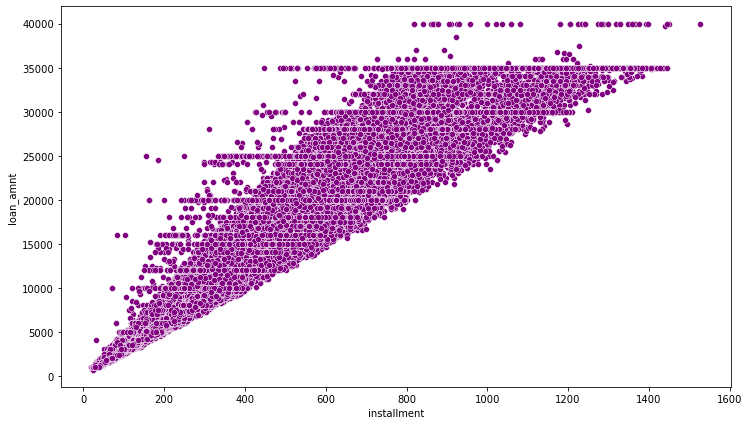

In [168]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df,color="purple", marker="o");

**TASK: Create a histogram of the loan_amnt column**

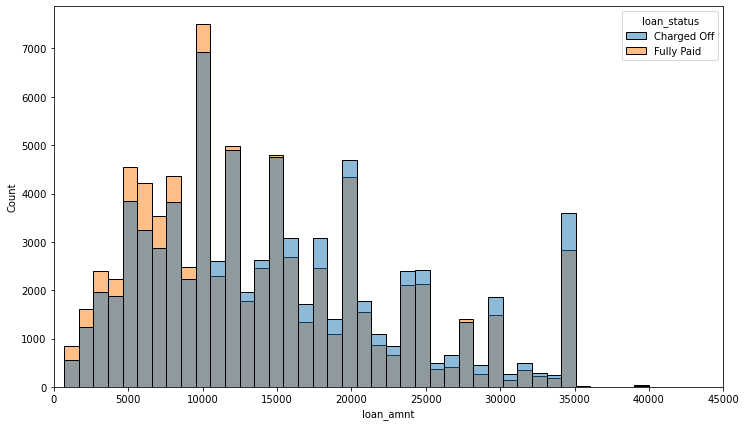

In [169]:
plt.figure(figsize=(12,7))
sns.histplot(x='loan_amnt',kde=False,bins=40,hue='loan_status', data=df )
plt.xlim(0,45000);

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

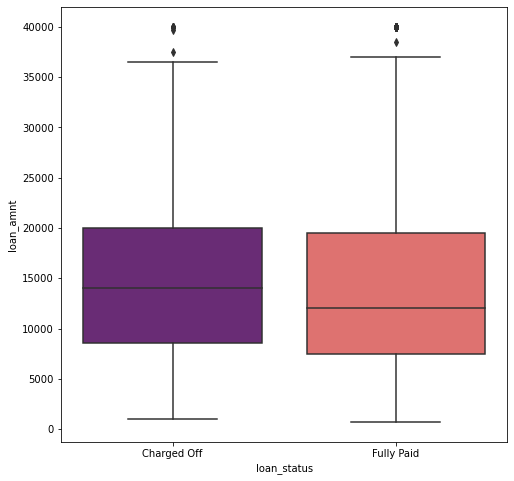

In [170]:
plt.figure(figsize=(8,8))
sns.boxplot(x='loan_status',y='loan_amnt',data=df,palette = "magma");

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status**

In [171]:
df.groupby('loan_status')['loan_amnt'].describe().T

loan_status,Charged Off,Fully Paid
count,77673.000000,77000.000000
mean,15126.300967,13915.827597
std,8505.090557,8320.529268
min,1000.000000,700.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19500.000000
max,40000.000000,40000.000000


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [172]:
feat_info('grade')


LC assigned loan grade


In [173]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

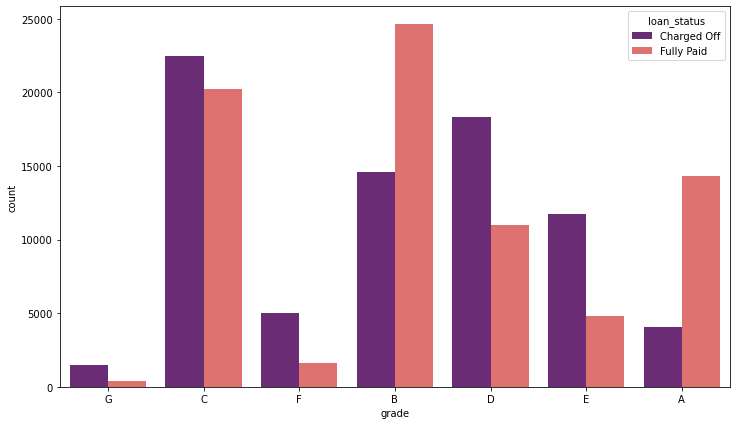

In [174]:
## Create a countplot per grade. Set the hue to the loan_status label
plt.figure(figsize=(12,7))
sns.countplot(x='grade',data=df,hue='loan_status',palette = "magma" );

In [175]:
feat_info('sub_grade')

LC assigned loan subgrade


In [176]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

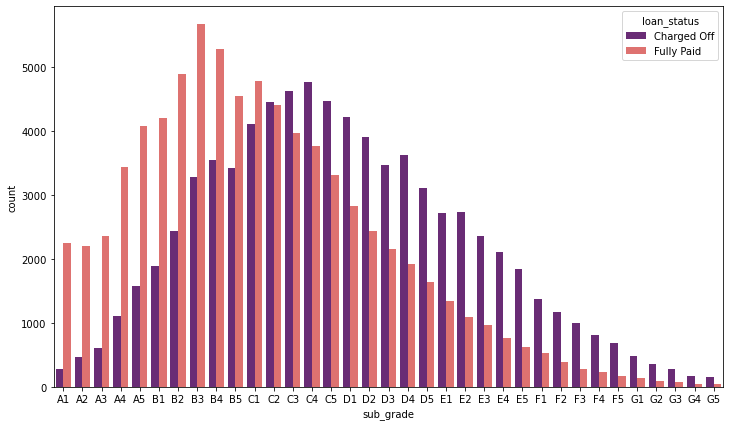

In [177]:
#Display a count plot per subgrade. Explore both all loans made per subgrade as well being separated based on the loan status

plt.figure(figsize=(12,7))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='magma' ,hue='loan_status');

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

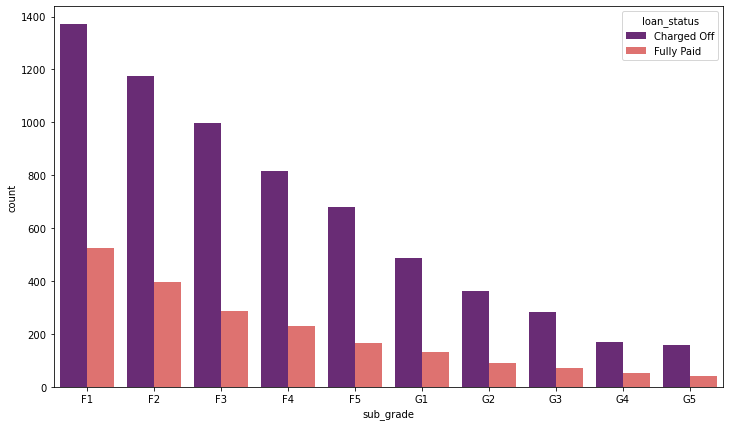

In [178]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,7))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status',palette='magma' );


**TASK: Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off**

In [179]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,0,Charged Off
1,0,Charged Off
2,0,Charged Off
3,1,Fully Paid
4,0,Charged Off


**TASK:  Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

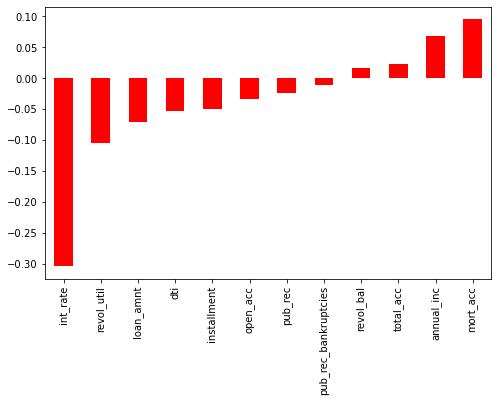

In [180]:
plt.figure(figsize=(8,5))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar', color='red');

# Section 2: Data PreProcessing

**There are two subsection on this section one Dealing with missing values and second converting categorical variables to numeric values.**

## a) Missing Data

In [181]:
#lenght of dataframe  
print(len(df))

154673


**TASK: Create a Series that displays the total count of missing values per column.**

In [182]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               10039
emp_length               8228
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     621
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                129
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                13488
pub_rec_bankruptcies      189
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [183]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.490467
emp_length              5.319610
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.401492
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.083402
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                8.720333
pub_rec_bankruptcies    0.122193
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook**

In [184]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: find, how many unique employment job titles are there?**

In [185]:
df['emp_title'].nunique()

76358

In [186]:
df['emp_title'].value_counts()

Manager                         1776
Teacher                         1742
Supervisor                       760
RN                               750
Registered Nurse                 740
                                ... 
Regional Security Specialist       1
Senior Production Specialist       1
US BORAX                           1
Career Advisor                     1
New Applications Specialist        1
Name: emp_title, Length: 76358, dtype: int64

**There are many job title, it is not too useful convert numeric values so this column  will drop from this dataset**

In [187]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column**

In [188]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [189]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

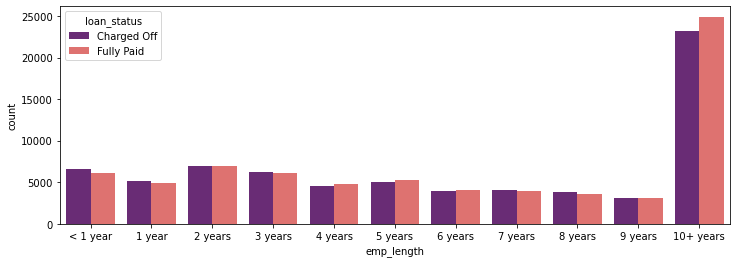

In [190]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,palette = "magma",hue='loan_status');

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series.**

In [191]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [192]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [193]:
emp_len = emp_co/emp_fp

In [194]:
emp_len

emp_length
1 year       1.046497
10+ years    0.932067
2 years      0.995829
3 years      1.014440
4 years      0.964420
5 years      0.972684
6 years      0.957271
7 years      1.010214
8 years      1.053370
9 years      1.004910
< 1 year     1.076784
Name: loan_status, dtype: float64

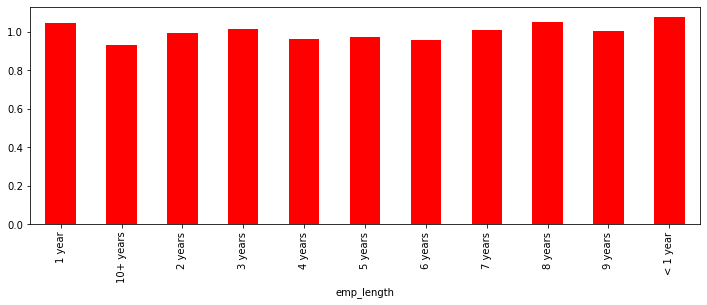

In [195]:
plt.figure(figsize=(12,4))
emp_len.plot(kind='bar', color='red');

**Charge off rates are extremely similar across all employment lengths. let's go ahead and drop the emp length column**

In [196]:
df = df.drop('emp_length',axis=1)

In [197]:
## Lets check again missing values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                     621
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                129
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                13488
pub_rec_bankruptcies      189
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [198]:
df['title'].head(10)

0                                   Other
1                      Debt consolidation
2                           Starting over
3    Personal loan for debt consolidation
4                 Personal Debt Free Loan
5                          Business start
6                                 LowRate
7                 Credit card refinancing
8                      Debt consolidation
9                      Debt consolidation
Name: title, dtype: object

In [199]:
df['purpose'].head(10)

0                 other
1    debt_consolidation
2           credit_card
3    debt_consolidation
4    debt_consolidation
5        small_business
6    debt_consolidation
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. let's go ahead and drop the title column**


In [200]:
df = df.drop('title',axis=1)

**TASK: Find out what the mort_acc feature represents**

In [201]:
feat_info('mort_acc')

Number of mortgage accounts.


In [202]:
df['mort_acc'].value_counts()

0.0     58733
1.0     23889
2.0     19056
3.0     14128
4.0     10277
5.0      6569
6.0      4037
7.0      2150
8.0      1111
9.0       559
10.0      286
11.0      156
12.0       84
13.0       44
14.0       33
15.0       22
16.0       15
17.0        7
20.0        6
19.0        5
18.0        5
22.0        4
24.0        4
21.0        2
25.0        1
23.0        1
27.0        1
Name: mort_acc, dtype: int64

** Let's review the other columsn to see which most highly correlates to mort_acc**

In [203]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082758
dti                    -0.017690
revol_util              0.008134
pub_rec                 0.009296
pub_rec_bankruptcies    0.031512
loan_repaid             0.095423
open_acc                0.110556
installment             0.191798
revol_bal               0.194046
annual_inc              0.213982
loan_amnt               0.220695
total_acc               0.377579
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Let's fill in the missing mort_acc values based on their total_acc value.**

In [204]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [205]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [206]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [207]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              129
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    189
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [208]:
df = df.dropna()

In [209]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## b) Categorical Variables and Dummy Variables

**Now I  just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric.**

In [210]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Let's now go through all the string features to see what I should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [211]:
df['term'].value_counts()

 36 months    108666
 60 months     45689
Name: term, dtype: int64

In [212]:
# use apply function
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [213]:
df['term'].head()

0    60
1    60
2    60
3    60
4    36
Name: term, dtype: int64

### grade feature

**TASK: grade is part of sub_grade, so just drop the grade feature.**

In [214]:
df=df.drop('grade', axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [215]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [216]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [217]:
#check  columns to how look like converting dummy variables 
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [218]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [219]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [220]:
df['home_ownership'].value_counts()

MORTGAGE    73364
RENT        65845
OWN         15085
OTHER          45
NONE           14
ANY             2
Name: home_ownership, dtype: int64

In [221]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [222]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [223]:
df['zip_code'].head()

0    11650
1    11650
2    30723
3    30723
4    11650
Name: zip_code, dtype: object

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [224]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**TASK: This would be data leakage, I wouldn't know beforehand whether or not a loan would be issued when using my  model, so in theory  I wouldn't have an issue_date, drop this feature.**

In [225]:
feat_info('issue_d')

The month which the loan was funded


In [226]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [227]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [228]:
# check  object on dataset
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

**TASK: drop the load_status column I created earlier, since its a duplicate of the loan_repaid column. I will use the loan_repaid column since its already in 0s and 1s.**

In [229]:
df = df.drop('loan_status',axis=1)

In [230]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,35000.0,60,25.80,1043.78,172500.0,13.47,8.0,1.0,147789.0,79.9,...,0,1,0,0,0,0,0,0,0,1992
1,16000.0,60,14.49,376.37,37000.0,9.86,9.0,1.0,8389.0,65.5,...,0,1,0,0,0,0,0,0,0,1999
2,35000.0,60,24.50,1017.07,120000.0,17.98,9.0,0.0,31307.0,76.0,...,0,0,0,0,1,0,0,0,0,2000
3,16800.0,60,12.99,382.17,93900.0,5.17,18.0,0.0,11911.0,24.4,...,0,0,0,0,1,0,0,0,0,1995
4,20050.0,36,18.49,729.80,47000.0,20.32,14.0,0.0,6263.0,51.8,...,0,1,0,0,0,0,0,0,0,2001


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154355 entries, 0 to 154672
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            154355 non-null  float64
 1   term                                 154355 non-null  int64  
 2   int_rate                             154355 non-null  float64
 3   installment                          154355 non-null  float64
 4   annual_inc                           154355 non-null  float64
 5   dti                                  154355 non-null  float64
 6   open_acc                             154355 non-null  float64
 7   pub_rec                              154355 non-null  float64
 8   revol_bal                            154355 non-null  float64
 9   revol_util                           154355 non-null  float64
 10  total_acc                            154355 non-null  float64
 11  mort_acc     

# Section 3 Creating the Model

## Splitting data train and test

**TASK: Set X and y variables to the .values of the features and label.**

In [232]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

**TASK: Perform a train/test split with test_size=0.25 and a random_state of 101.**

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)



In [234]:
len(X_train)

115766

In [235]:
len(X_test)

38589

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test.**

In [236]:
scaler = MinMaxScaler()


In [237]:
X_train = scaler.fit_transform(X_train)

In [238]:
X_test = scaler.transform(X_test)

In [239]:
X_train

array([[0.5162317 , 1.        , 0.33774834, ..., 0.        , 0.        ,
        0.79710145],
       [0.14958625, 0.        , 0.53252824, ..., 1.        , 0.        ,
        0.82608696],
       [0.38510503, 1.        , 0.6104402 , ..., 0.        , 0.        ,
        0.84057971],
       ...,
       [0.36346276, 1.        , 0.38098948, ..., 0.        , 0.        ,
        0.88405797],
       [0.33290898, 0.        , 0.40085703, ..., 0.        , 0.        ,
        0.92753623],
       [0.36346276, 0.        , 0.37670432, ..., 0.        , 0.        ,
        0.95652174]])

In [240]:
X_test 

array([[0.10057288, 0.        , 0.33735878, ..., 0.        , 0.        ,
        0.73913043],
       [0.35582432, 1.        , 0.50370082, ..., 0.        , 0.        ,
        0.7826087 ],
       [0.38892425, 1.        , 0.35099338, ..., 0.        , 0.        ,
        0.8115942 ],
       ...,
       [0.74538511, 1.        , 0.55317491, ..., 0.        , 0.        ,
        0.84057971],
       [0.61807766, 1.        , 0.2267238 , ..., 0.        , 0.        ,
        0.84057971],
       [0.08084023, 0.        , 0.35021426, ..., 0.        , 0.        ,
        0.7826087 ]])

## Creating First Model 

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19 --> 9 --> 1 output neuron**

In [241]:
model = Sequential()


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.25))

# hidden layer
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.25))


# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [242]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [243]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
           callbacks=[early_stop] 
         )

Epoch 1/25
453/453 [==============================] - 5s 7ms/step - loss: 0.4755 - val_loss: 0.3746
Epoch 2/25
453/453 [==============================] - 3s 7ms/step - loss: 0.3820 - val_loss: 0.3664
Epoch 3/25
453/453 [==============================] - 5s 10ms/step - loss: 0.3746 - val_loss: 0.3641
Epoch 4/25
453/453 [==============================] - 5s 10ms/step - loss: 0.3717 - val_loss: 0.3627
Epoch 5/25
453/453 [==============================] - 4s 9ms/step - loss: 0.3697 - val_loss: 0.3622
Epoch 6/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3680 - val_loss: 0.3618
Epoch 7/25
453/453 [==============================] - 4s 9ms/step - loss: 0.3676 - val_loss: 0.3613
Epoch 8/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3668 - val_loss: 0.3620
Epoch 9/25
453/453 [==============================] - 3s 7ms/step - loss: 0.3664 - val_loss: 0.3611
Epoch 10/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3658 - val_loss: 0.36

# Evaluating First Model Performance.


In [244]:
losses = pd.DataFrame(model.history.history)

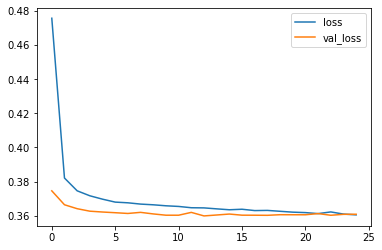

In [245]:
losses[['loss','val_loss']].plot();

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [246]:
predictions = (model.predict(X_test) > 0.5).astype('int64')


In [247]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     19342
           1       0.80      0.79      0.80     19247

    accuracy                           0.80     38589
   macro avg       0.80      0.80      0.80     38589
weighted avg       0.80      0.80      0.80     38589



In [248]:
cm=confusion_matrix(y_test,predictions)

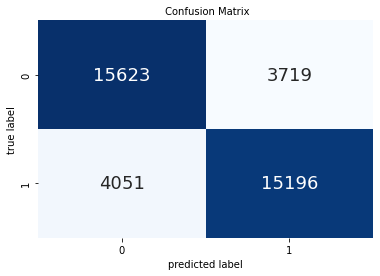

In [249]:
plt.title(" Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label");

## Creating Second Module Different layer, epoch and bach size

**TASK: Build a sequential model to will be trained on the data.  a model that goes 78 --> 39 --> 19 --> 1 output neuron**

In [250]:
model1 = Sequential()


# input layer
model1.add(Dense(78,  activation='relu'))
model1.add(Dropout(0.25))

# hidden layer
model1.add(Dense(39, activation='relu'))
model1.add(Dropout(0.25))

# hidden layer
model1.add(Dense(19, activation='relu'))
model1.add(Dropout(0.25))


# output layer
model1.add(Dense(units=1,activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [251]:
early_stop1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [252]:
model1.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=256,
          validation_data=(X_test, y_test),
           callbacks=[early_stop1] 
         )

Epoch 1/50
453/453 [==============================] - 6s 10ms/step - loss: 0.4551 - val_loss: 0.3747
Epoch 2/50
453/453 [==============================] - 3s 7ms/step - loss: 0.3776 - val_loss: 0.3645
Epoch 3/50
453/453 [==============================] - 3s 7ms/step - loss: 0.3699 - val_loss: 0.3624
Epoch 4/50
453/453 [==============================] - 3s 7ms/step - loss: 0.3665 - val_loss: 0.3626
Epoch 5/50
453/453 [==============================] - 4s 9ms/step - loss: 0.3654 - val_loss: 0.3609
Epoch 6/50
453/453 [==============================] - 4s 9ms/step - loss: 0.3638 - val_loss: 0.3605
Epoch 7/50
453/453 [==============================] - 3s 8ms/step - loss: 0.3637 - val_loss: 0.3607
Epoch 8/50
453/453 [==============================] - 4s 9ms/step - loss: 0.3626 - val_loss: 0.3607
Epoch 9/50
453/453 [==============================] - 5s 10ms/step - loss: 0.3619 - val_loss: 0.3627
Epoch 10/50
453/453 [==============================] - 4s 9ms/step - loss: 0.3620 - val_loss: 0.36

## Evaluating Second Model Performance.

In [253]:
losses1 = pd.DataFrame(model1.history.history)

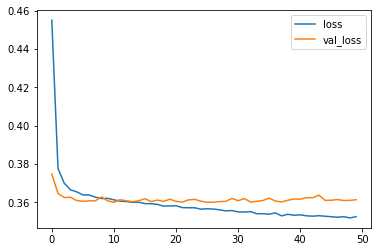

In [254]:
losses1[['loss','val_loss']].plot();

In [255]:
predictions1 = (model1.predict(X_test) > 0.5).astype('int64')

In [256]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80     19342
           1       0.81      0.78      0.80     19247

    accuracy                           0.80     38589
   macro avg       0.80      0.80      0.80     38589
weighted avg       0.80      0.80      0.80     38589



In [257]:
cm1=confusion_matrix(y_test,predictions1)

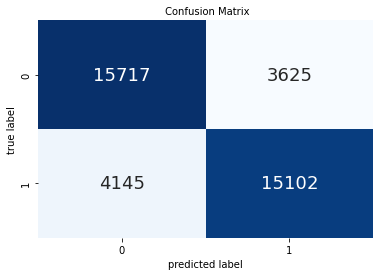

In [258]:
plt.title(" Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm1,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label");

## Creating Third Model

**TASK: Build a sequential model to will be trained on the data. a model that goes 78 --> 39--> 19 -->9 ---> 5 ---> 1 output neuron**

In [259]:
model2 = Sequential()


# input layer
model2.add(Dense(78,  activation='relu'))
model2.add(Dropout(0.25))

# hidden layer
model2.add(Dense(39, activation='relu'))
model2.add(Dropout(0.25))

# hidden layer
model2.add(Dense(19, activation='relu'))
model2.add(Dropout(0.25))
# hidden layer
model2.add(Dense(9, activation='relu'))
model2.add(Dropout(0.25))

# hidden layer
model2.add(Dense(5, activation='relu'))
model2.add(Dropout(0.25))



# output layer
model2.add(Dense(units=1,activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam')

In [260]:
early_stop2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [261]:
model2.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
           callbacks=[early_stop1] 
         )

Epoch 1/25
453/453 [==============================] - 6s 10ms/step - loss: 0.5352 - val_loss: 0.3696
Epoch 2/25
453/453 [==============================] - 5s 12ms/step - loss: 0.3998 - val_loss: 0.3690
Epoch 3/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3916 - val_loss: 0.3660
Epoch 4/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3892 - val_loss: 0.3645
Epoch 5/25
453/453 [==============================] - 4s 8ms/step - loss: 0.3869 - val_loss: 0.3644
Epoch 6/25
453/453 [==============================] - 5s 11ms/step - loss: 0.3850 - val_loss: 0.3640
Epoch 7/25
453/453 [==============================] - 4s 10ms/step - loss: 0.3857 - val_loss: 0.3640
Epoch 8/25
453/453 [==============================] - 4s 9ms/step - loss: 0.3834 - val_loss: 0.3662
Epoch 9/25
453/453 [==============================] - 5s 11ms/step - loss: 0.3840 - val_loss: 0.3625
Epoch 10/25
453/453 [==============================] - 5s 11ms/step - loss: 0.3833 - val_loss: 

## Evaluating Third Model Performance.

In [262]:
losses2 = pd.DataFrame(model2.history.history)

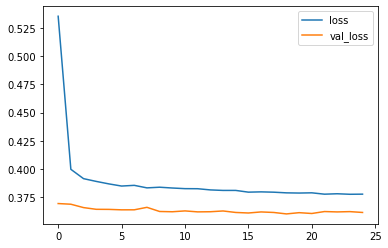

In [263]:
losses2[['loss','val_loss']].plot();

In [264]:
predictions2 = (model2.predict(X_test) > 0.5).astype('int64')

In [265]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     19342
           1       0.81      0.78      0.79     19247

    accuracy                           0.80     38589
   macro avg       0.80      0.80      0.80     38589
weighted avg       0.80      0.80      0.80     38589



In [266]:
cm2=confusion_matrix(y_test,predictions2)

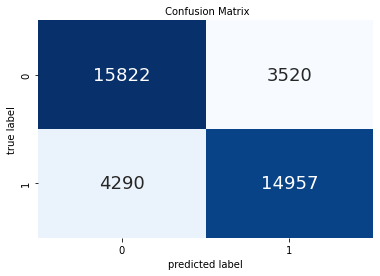

In [267]:
plt.title(" Confusion Matrix",fontsize=10,color="black")
sns.heatmap(cm2,annot=True, cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 18})
plt.xlabel("predicted label")
plt.ylabel("true label");

**TASK: Given the customers below, would you offer this person a loan?**

In [268]:
import random
random.seed(10)
random_ind = random.randint(0,len(df))

new_customer1 = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer1

loan_amnt           22000.00
term                   36.00
int_rate                8.90
installment           698.58
annual_inc          80000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1999.00
Name: 150100, Length: 78, dtype: float64

In [269]:
#First Model Prediction

predictions = (model.predict(new_customer1.values.reshape(1,78)) > 0.5).astype('int64')
print('Predicted Values :',predictions)
print('Actual values:',df.iloc[random_ind]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


In [270]:
#Second Model Prediction

predictions1 = (model1.predict(new_customer1.values.reshape(1,78)) > 0.5).astype('int64')
predictions1
print('Predicted Values :',predictions1)
print('Actual values:',df.iloc[random_ind]['loan_repaid'])


Predicted Values : [[1]]
Actual values: 1.0


In [271]:
#Third Model Prediction

predictions2 = (model2.predict(new_customer1.values.reshape(1,78)) > 0.5).astype('int64')
predictions2
print('Predicted Values :',predictions2)
print('Actual values:',df.iloc[random_ind]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


**Second Customer Predictions**

In [272]:
random.seed(5)
random_ind1 = random.randint(0,len(df))

new_customer2 = df.drop('loan_repaid',axis=1).iloc[random_ind1]
new_customer2

loan_amnt           14500.00
term                   36.00
int_rate                6.03
installment           441.32
annual_inc          75458.13
                      ...   
48052                   1.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1999.00
Name: 67095, Length: 78, dtype: float64

In [273]:
#First Model Prediction for Second Customer

predictions = (model.predict(new_customer2.values.reshape(1,78)) > 0.5).astype('int64')
print('Predicted Values :',predictions)
print('Actual values:',df.iloc[random_ind1]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


In [274]:
#Second Model Prediction for Second Customer

predictions1 = (model1.predict(new_customer2.values.reshape(1,78)) > 0.5).astype('int64')
predictions1
print('Predicted Values :',predictions1)
print('Actual values:',df.iloc[random_ind1]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


In [275]:
#Third Model Prediction for Second Costomur

predictions2 = (model2.predict(new_customer2.values.reshape(1,78)) > 0.5).astype('int64')
predictions2
print('Predicted Values :',predictions2)
print('Actual values:',df.iloc[random_ind1]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


## Third Customer Predictions

In [276]:
random.seed(15)
random_ind3 = random.randint(0,len(df))

new_customer3 = df.drop('loan_repaid',axis=1).iloc[random_ind3]
new_customer3

loan_amnt            1500.00
term                   36.00
int_rate               15.31
installment            52.23
annual_inc          80000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   1.00
earliest_cr_year     1996.00
Name: 54897, Length: 78, dtype: float64

In [277]:
#First Model Prediction for Second Customer

predictions = (model.predict(new_customer3.values.reshape(1,78)) > 0.5).astype('int64')
print('Predicted Values :',predictions)
print('Actual values:',df.iloc[random_ind3]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


In [278]:
#Second Model Prediction for Second Customer

predictions1 = (model1.predict(new_customer3.values.reshape(1,78)) > 0.5).astype('int64')
predictions1
print('Predicted Values :',predictions1)
print('Actual values:',df.iloc[random_ind3]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


In [279]:
#Third Model Prediction for Second Costomur

predictions2 = (model2.predict(new_customer3.values.reshape(1,78)) > 0.5).astype('int64')
predictions2
print('Predicted Values :',predictions2)
print('Actual values:',df.iloc[random_ind3]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 0.0


## Forth Customer Predictions

In [280]:
random.seed(20)
random_ind4 = random.randint(0,len(df))

new_customer4 = df.drop('loan_repaid',axis=1).iloc[random_ind4]
new_customer4

loan_amnt            8000.00
term                   36.00
int_rate                7.90
installment           250.33
annual_inc          66900.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 39720, Length: 78, dtype: float64

In [281]:
#First Model Prediction for Second Customer

predictions = (model.predict(new_customer4.values.reshape(1,78)) > 0.5).astype('int64')
print('Predicted Values :',predictions)
print('Actual values:',df.iloc[random_ind4]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


In [282]:
#Second Model Prediction for Second Customer

predictions1 = (model1.predict(new_customer4.values.reshape(1,78)) > 0.5).astype('int64')
predictions1
print('Predicted Values :',predictions1)
print('Actual values:',df.iloc[random_ind4]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


In [283]:
#Third Model Prediction for Second Costomur

predictions2 = (model2.predict(new_customer4.values.reshape(1,78)) > 0.5).astype('int64')
predictions2
print('Predicted Values :',predictions2)
print('Actual values:',df.iloc[random_ind4]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


## Fifth Customer Predictions

In [284]:
random.seed(25)
random_ind5 = random.randint(0,len(df))

new_customer5 = df.drop('loan_repaid',axis=1).iloc[random_ind5]
new_customer5

loan_amnt           20000.00
term                   60.00
int_rate               13.66
installment           461.85
annual_inc          90000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1999.00
Name: 99020, Length: 78, dtype: float64

In [285]:
#First Model Prediction for Second Customer

predictions = (model.predict(new_customer5.values.reshape(1,78)) > 0.5).astype('int64')
print('Predicted Values :',predictions)
print('Actual values:',df.iloc[random_ind5]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


In [286]:
#Second Model Prediction for Second Customer

predictions1 = (model1.predict(new_customer5.values.reshape(1,78)) > 0.5).astype('int64')
predictions1
print('Predicted Values :',predictions1)
print('Actual values:',df.iloc[random_ind5]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


In [287]:
#Third Model Prediction for Second Costomur

predictions2 = (model2.predict(new_customer5.values.reshape(1,78)) > 0.5).astype('int64')
predictions2
print('Predicted Values :',predictions2)
print('Actual values:',df.iloc[random_ind5]['loan_repaid'])

Predicted Values : [[1]]
Actual values: 1.0


## Creating Data Frame 

In [290]:
df_p={
      'Actual values':[1,0,0,1,1],
      'Predict_First_Model':[1,1,1,1,1],
      'Predict_Second_Model':[1,1,1,1,1],
      'Predict_Third_Model':[1,1,1,1,1],
}

In [291]:
data = pd.DataFrame(df_p,index=['costumer1','costumer2','costumer3','costumer4','costumer5'])
data

,Actual values,Predict_First_Model,Predict_Second_Model,Predict_Third_Model
costumer1,1,1,1,1
costumer2,0,1,1,1
costumer3,0,1,1,1
costumer4,1,1,1,1
costumer5,1,1,1,1


## End of Project